<a href="https://colab.research.google.com/github/mevangelista-alvarado/Python_Notas/blob/master/Intro_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

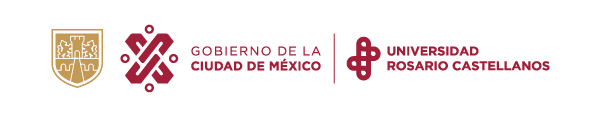

**Actualizado:** Septiembre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

# Módulo `Numpy`

La estructura y algunas ideas de este material se tomaron del siguiente tutorial:
https://numpy.org/devdocs/user/quickstart.html



Numpy es una biblioteca de Python que nos crea un objeto con un array multidimensional, objetos derivados y una serie de operaciones para arrays. Esta librería de código abierto fue creada en 2005 por Travis Oliphant.

Los objetos principales de Numpy son arreglos multidimensionales: una tabla de elementos (generalmente números), todos del mismo tipo, indexados por una tupla de enteros no-negativos. En Numpy las dimensiones son llamadas _ejes_.

Por ejemplo, las coordenadas de un punto `[1, 2, 1]` en el espacio 3D tiene un solo eje.  Ese eje tiene 3 elementos, así que diremos que tiene longitud 3.

El siguiente ejemplo, tiene dos ejes; el primer eje tiene una longitud igual a 2 y el segundo una longitud igual a 3:

In [ ]:
[[1., 0.], [0., 1., 2.]]

La clase de un arreglo en Numpy se llama `ndarray`.  Los atributos más importantes de un objeto `ndarray` son:



*   __`len`__ : número de ejes de un arreglo.
*   __`ndarray.shape`__ :  la dimensión de un arreglo. Es una tupla de enteros que indican el tamaño de un arreglo en cada dimensión. Para una matriz con `n` filas y `m` columnas, `saphe` será `(n, m)`.  La longitud de la tupla `shape` es el número de ejes, es decir `ndim`.
* __`ndarray.size`__ : es el número total de elementos del arreglo. Es igual al producto de los elementos de `shape`.




In [ ]:
import numpy as np

a = np.array([[0, 1, 2], [3, 4, 5]])

In [ ]:
a.shape

In [ ]:
a.size

In [ ]:
len(a)

## Creación de Arreglos

Existen varias formas de crear arreglos. Por ejemplo, podemos crear un arreglo desde una lista o tupla regular de Python usando la función `array`.

In [ ]:
import numpy as np

In [ ]:
a = np.array([2, 3, 4])
a

In [ ]:
b = np.array([1.2, 2.3, 3.4])
b

In [ ]:
a.dtype # tipo de elemento del arreglo a

In [ ]:
b.dtype # tipo de elemento del arreglo b

Un ***ERROR*** frecuente consiste en crear `array` con multiples argumentos numéricos en lugar de con un lista de números como argumento.

In [ ]:
 # a = np.array(1, 2, 3, 4) # incorrecto

In [ ]:
a = np.array([1, 2, 3, 4])

Los `array` transforman sucesiones de sucesiones en arreglos de dimensión dos;  sucesiones de sucesiones de sucesiones en arreglos de dimensión 3 y así sucesivamente. Por ejemplo:

In [ ]:
b = np.array([(1, 2, 3), (4, 5, 6)])
b

El tipo de un arreglo también se puede especificar explicitamente al momento de crearlo:

In [ ]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

En ocasiones, los elementos de un arreglo son desconocidos, pero el tamaño es conocido. Por tal motivo, Numpy tiene varias funciones que nos permiten crear arreglos sin especificar el contenido inicial pero si el tamaño. Esto minimiza la necesidad de crecer arreglos con operaciones más costosas.

La función `zeros` crea un arreglo solo de ceros, la función `ones` crea arreglos con solo unos y la función `empty`  crea un arreglo cuyo contenido inicial es aleatorio y depende del estado de la memoria. Por default, el `dtype` de un arreglo creado de esta forma es `float64`.

In [ ]:
np.zeros((3, 4))

In [ ]:
np.ones((2, 3, 4), dtype=np.int16) # podemos especificar el tipo de elementos

In [ ]:
np.empty((2, 3)) # el contenido varía
len(np.zeros((3, 4)))

Para crear sucesiones de números, Numpy tiene una función análoga a `range` que regresa arreglos en lugar de listas:

In [ ]:
np.arange(10, 30, 5)

In [ ]:
np.arange(0, 2, 0.3)

Cuando usamos `arange` con números flotantes, generalmente no podemos determinar el número de elementos que vamos a obtener debido a la precisión finita de los valores flotante. Por esta razón es mejor usar la función `linspace` que recibe como un argumento el número de elementos que queremos, en lugar del 'paso':

In [ ]:
from numpy import pi

np.linspace(0, 2, 9) # nueve numeros del 0 al 2

In [ ]:
x = np.linspace(0, 2*pi, 20)
f = np.sin(x)
print(f)

## Operaciones Básicas y Funciones Universales

Las operaciones aritméticas en arreglos se aplican elemento a elemento. Un nuevo arreglo se crea y se llena con el resultado.

In [ ]:
import numpy as np
a = np.array([20, 30, 40, 50])
b = np.arange(4)
b

In [ ]:
c = a - b
c

In [ ]:
b**2

In [ ]:
np.sin(a)
# 10*np.sin(a)

In [ ]:
a < 35

El operador `*` en Numpy no es el producto de matrices, este operador multiplica elemento a elemento. Para realizar producto de matrices debemos usar el operador `@` o la función `dot`. Por ejemplo:

In [ ]:
import numpy as np
A = np.array([[1 , 1], [5 , 1]])
B = np.array([[2 , 0], [3, 2]])

In [ ]:
# Producto elemento a elemento
A * B

In [ ]:
# Producto de matrices
A @ B

In [ ]:
# Funcion dot
A.dot(B)

Algunas operaciones como `+=` y `*=`modifican un arreglo existente en lugar de crear uno nuevo.

In [ ]:
a = np.ones((2, 3), dtype=int)
b = np.random.random((2, 3))
b

In [ ]:
a *=3
a

In [ ]:
b

In [ ]:
b += a
b

In [ ]:
# a += b #b no se convierte automáticamente a tipo entero

Cuando operamos arreglos de diferente tipo, el tipo resultante del arreglo corresponderá al tipo más general o preciso.

In [ ]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, np.pi, 3)
b
a

In [ ]:
c = a+b
c

In [ ]:
c.dtype.name

In [ ]:
d = np.exp(c * 1j)
d

In [ ]:
d.dtype.name

Algunas operaciones, como calcular la suma de todos los elementos en un arreglo, son implementadas como métodos de la clase `ndarray`.

In [ ]:
a = np.random.random((2, 3))
a

In [ ]:
a.sum() # calcula la suma de todos los elementos del arreglo

In [ ]:
a.min() # regresa el valor minimo del arreglo

In [ ]:
a.max() # regresa el valor maximo del arreglo

Por default, estas operaciones se aplican a toda la lista de números del arreglo sin tomar en cuenta su forma. Sin embargo, si especificamos el parámetro `axis`, entonces podemos aplicar estas operaciones a un eje especificado del arreglo.

In [ ]:
b = np.arange(12).reshape(6, 2)
b

In [ ]:
b.sum(axis=0) # suma de cada columna

In [ ]:
b.min(axis=1) # mínimo de cada fila

In [ ]:
b.cumsum(axis=1)  # suma acumulativa en cada fila

Numpy también tiene integrado funciones matemáticas tales como `sin`, `cos` y `exp`. En Numpy, este tipo de funciones se llaman __funciones universales__. Estas funciones también operan elemento a elemento en un arreglo y producen un arreglo como salida.

In [ ]:
B = np.arange(3)
B

In [ ]:
np.exp(B)

In [ ]:
np.sqrt(B)

In [ ]:
C = np.array([2., -1., 4.])

In [ ]:
np.add(B, C)

## Indexando, Partiendo e Iterando Arreglos

Al igual que en las listas, podemos acceder a los elementos de un arreglo por un índice o acceder a una parte del arreglo. Por ejemplo:

In [ ]:
a = np.arange(10)**3
a

In [ ]:
a[2]

In [ ]:
a[2: 5]

In [ ]:
a[: 6: 2] = -1000 # equivalente a a[0:6:2] = -1000; desde la posicion inicial hasta la posicion 5, cambia cadas seguno elemento por 1000
a

In [ ]:
a[ : :-1] # invierte a

In [ ]:
for i in a:
  print(i**(1/3.))

Los arreglos multidimensionales tienen un índice por eje. Estos índices son dados en una tupla separada por comas:

In [ ]:
def f(x, y):
  return 10*x + y

In [ ]:
b = np.fromfunction(f, (5, 4), dtype=int)
b

In [ ]:
b[2, 3]

In [ ]:
b[0: 5, 1] # elementos de la segunda columna de b

In [ ]:
b[ : , 1]

In [ ]:
b[1: 3, : ] # cada columna en la segunda y tercera fila de b

In [ ]:
b[-1]

Iterar sobre arreglos multidimensionales se realiza con respecto a los primeros ejes:

In [ ]:
for row in b:
  print(row)

Sin embargo, si lo que queremos es operar en cada elemento en el arreglo, podemos usar el atributo `flat`, el cual es un iterador sobre todos los elementos del arreglo:

In [ ]:
for element in b.flat:
  print(element)

## Álgebra Lineal



Numpy también tiene integradas algunas funciones de ágebra lineal.

In [ ]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

In [ ]:
a.transpose() # transpuesta de una matriz

In [ ]:
np.linalg.inv(a) # inversa de una matriz

In [ ]:
u = np.eye(2) # matriz Identidad 2x2
u

In [ ]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
j @ j # producto de matrices

In [ ]:
np.trace(u)  # traza

In [ ]:
y = np.array([[5.], [7.]])
y

In [ ]:
np.linalg.solve(a, y) # resuelve el sistema ax=y

In [ ]:
np.linalg.eig(j) # calcula los eigenvalores y eigenvectores de un arreglo cuadrado

Por, último para saber la versión del módulo hacemos lo siguiente:  

In [ ]:
np.__version__